Stokes Boundary Layer
===========

see https://en.wikipedia.org/wiki/Stokes_problem

In [1]:
import numpy as np
from numpy import pi

import matplotlib as mpl
from matplotlib import pyplot as plt
from cycler import cycler

%matplotlib inline
color_cycle = cycler('color',['#377eb8','#4daf4a','#e41a1c','#984ea3','#ff7f00','#a65628','#f781bf','#999999','#ffff33'])
mpl.rc('figure',figsize=[2.7,1.6])
mpl.rc('font',size=8.0)
#mpl.rcParams['font.sans-serif'] = 'Helvetica'
mpl.rc('lines',linewidth=0.7) 
mpl.rc('axes',prop_cycle=color_cycle,grid=True,linewidth=0.5,axisbelow=True,unicode_minus=False)
mpl.rc('grid',linewidth=0.3,linestyle=':')
mpl.rc('legend',fontsize='medium',framealpha=1.0,numpoints=1)
mpl.rc('svg',fonttype='none')
mpl.rc('savefig',dpi=300)


In [2]:
#material properties
rho = 1.225 # density
mu = 1.829e-5 # dynamic viscosity
nu = mu/rho

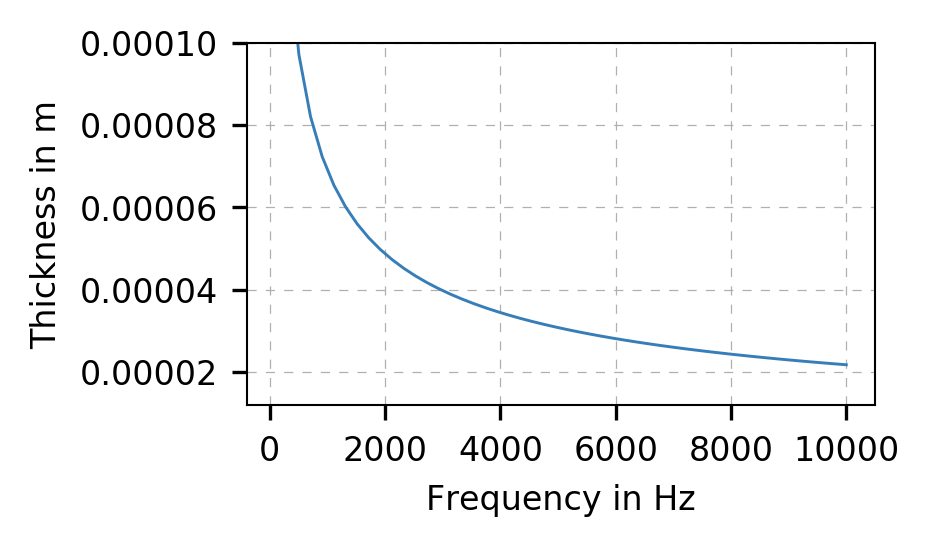

In [3]:
# boundary layer thickness
f = np.linspace(100,10000)
#f = np.array([500,1000,20000,10000])
omega = 2*pi*f
d = np.sqrt(2*nu/omega)
fig,ax = plt.subplots()
ax.plot(f,d)
ax.set_ylim(top=1e-4)
ax.set_xlabel('Frequency in Hz')
ax.set_ylabel('Thickness in m')



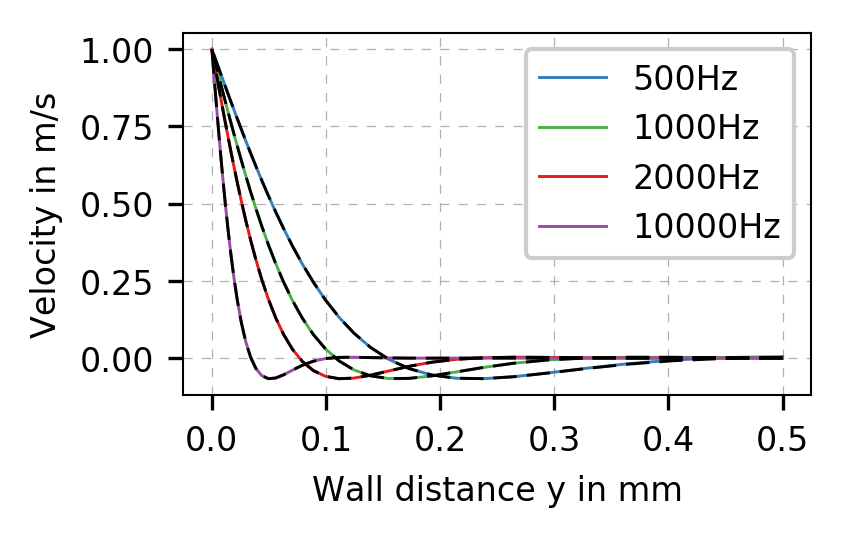

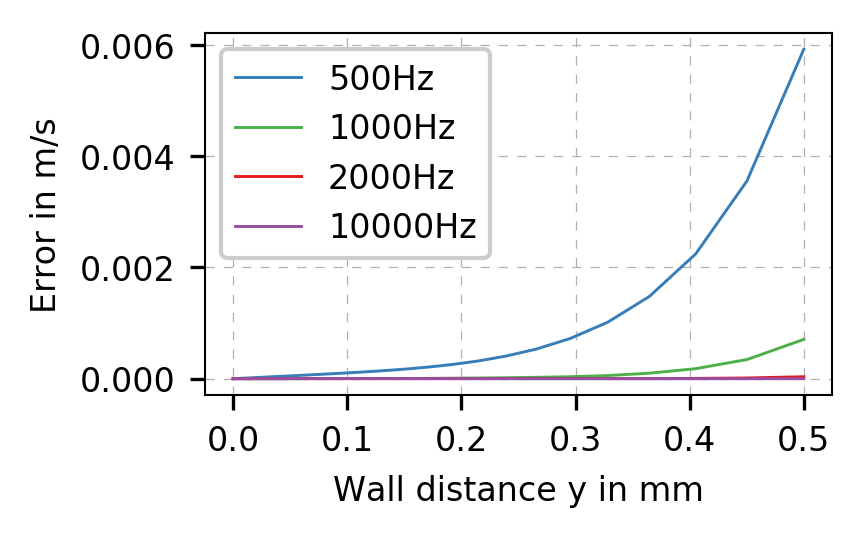

In [4]:
# Error
f = np.array([500,1000,2000,10000])

import h5py
from sys import path
path.append('/home/hhassanp/CFS/share/python/')
path.append('/home/flo/cfs/CFS/share/python/')
from hdf5_tools import get_centroids, get_result, get_coordinates, get_step_values

try :
    h5 = h5py.File('results_hdf5/StokesBoundaryLayer2D.cfs')
    X = get_coordinates(h5)
    V = get_result(h5,'fluidMechVelocity',step='all')
    f = get_step_values(h5)[0]
except Exception as e:
    h5.close()
xmin = X[:,0].min()    
I = (np.abs(X[:,0] - xmin)<1e-6) # take the nodes on the left


omega = 2*pi*f
u = np.exp(-(1+1j)*np.outer(np.sqrt(omega/(2*nu)),X[I,1]))

fig,ax = plt.subplots()

ax.plot(X[I,1]*1e+3,V[:,I,0].real.T)
ax.plot(X[I,1]*1e+3,u.real.T,'--k')
ax.legend(['%.0fHz'%val for val in f])
ax.set_ylabel('Velocity in m/s')
ax.set_xlabel('Wall distance y in mm')

#print(error)
fig,ax = plt.subplots()
ax.plot(X[I,1]*1e+3,np.abs((u-V[:,I,0])).T)
ax.legend(['%.0fHz'%val for val in f])
ax.set_ylabel('Error in m/s')
ax.set_xlabel('Wall distance y in mm')